In [1]:
using JLD2, CairoMakie, StatsBase
using Jchemo, JchemoData

In [2]:
using JchemoData, JLD2, CairoMakie
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/cassav.jld2")
@load db dat
pnames(dat)

(:X, :Y)

In [3]:
X = dat.X
Y = dat.Y

Row,year,tbc
,Int64,Float64
1,2009,1.58068
2,2009,7.85516
3,2009,1.77595
4,2009,9.42472
5,2009,6.33471
6,2009,1.73723
7,2009,5.29676
8,2009,6.28836
9,2009,7.55252


In [4]:
@head X

... (280, 1050)
 


Row,400,402,404,406,408,410,412,414,416,418,420,422,424,426,428,430,432,434,436,438,440,442,444,446,448,450,452,454,456,458,460,462,464,466,468,470,472,474,476,478,480,482,484,486,488,490,492,494,496,498,500,502,504,506,508,510,512,514,516,518,520,522,524,526,528,530,532,534,536,538,540,542,544,546,548,550,552,554,556,558,560,562,564,566,568,570,572,574,576,578,580,582,584,586,588,590,592,594,596,598,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.399996,0.406522,0.413008,0.41958,0.426073,0.43219,0.438007,0.443949,0.44995,0.455081,0.45934,0.463535,0.467663,0.4711,0.473688,0.475809,0.477585,0.479175,0.480602,0.481708,0.482613,0.483457,0.484222,0.484873,0.485359,0.485729,0.486114,0.486469,0.486478,0.48599,0.485258,0.484175,0.482594,0.481078,0.48004,0.478911,0.477338,0.475769,0.474313,0.472419,0.470243,0.468227,0.465727,0.461779,0.456278,0.44993,0.442413,0.433093,0.422563,0.411268,0.399469,0.387154,0.374109,0.360391,0.346233,0.331832,0.317179,0.302623,0.288342,0.274052,0.260325,0.247976,0.236827,0.226326,0.216817,0.208673,0.201658,0.195395,0.189823,0.185099,0.181055,0.177544,0.174485,0.171748,0.169348,0.167329,0.165411,0.163188,0.161034,0.159611,0.158424,0.15692,0.155245,0.153579,0.151826,0.150128,0.148504,0.14687,0.145472,0.144396,0.143197,0.141824,0.140615,0.13959,0.138668,0.137875,0.137149,0.136432,0.135721,0.134834,⋯
2,0.460896,0.46706,0.475677,0.483438,0.490809,0.49877,0.506465,0.513268,0.519421,0.525145,0.530744,0.536144,0.540957,0.545328,0.549367,0.552727,0.555333,0.557708,0.560185,0.562357,0.563894,0.564909,0.565277,0.565188,0.565042,0.564877,0.564355,0.563649,0.563257,0.563012,0.562394,0.561379,0.560341,0.559398,0.558006,0.555778,0.553171,0.550812,0.548678,0.546616,0.544579,0.542149,0.538448,0.533893,0.529018,0.523422,0.516682,0.509148,0.501018,0.491444,0.480527,0.469045,0.456873,0.443933,0.430479,0.416739,0.402484,0.387522,0.372858,0.359546,0.347254,0.334975,0.322734,0.311426,0.301126,0.291658,0.282998,0.27483,0.266987,0.259567,0.25244,0.245352,0.238349,0.23153,0.224645,0.217789,0.211007,0.204099,0.197368,0.191349,0.185842,0.180374,0.17498,0.169971,0.165402,0.161085,0.156995,0.153294,0.150104,0.147443,0.145052,0.142827,0.140707,0.138663,0.136762,0.13506,0.133552,0.132191,0.130964,0.129819,⋯
3,0.464731,0.471416,0.47828,0.48733,0.497117,0.503004,0.505579,0.509316,0.514649,0.519317,0.523192,0.527309,0.531434,0.534748,0.537076,0.539033,0.540811,0.541883,0.542183,0.54232,0.542744,0.543293,0.543675,0.54372,0.543589,0.543868,0.544487,0.544648,0.544239,0.543642,0.542987,0.542122,0.541004,0.539853,0.538904,0.537862,0.536159,0.534021,0.532138,0.530054,0.527327,0.524462,0.521329,0.51703,0.511295,0.504519,0.496551,0.487221,0.476865,0.464969,0.451786,0.438225,0.424616,0.41058,0.395809,0.380595,0.365225,0.349705,0.334253,0.319378,0.305204,0.291255,0.277619,0.265214,0.25445,0.244907,0.236255,0.228498,0.221774,0.216081,0.210953,0.206254,0.202226,0.198769,0.195577,0.192592,0.189974,0.187627,0.185356,0.183314,0.181477,0.179274,0.176502,0.174001,0.172465,0.171099,0.169275,0.167275,0.165531,0.164022,0.162529,0.161149,0.160061,0.159114,0.157931,0.156577,0.155341,0.154278,0.153273,0.152306,⋯


In [5]:
@head Y

... (280, 2)
 


Row,year,tbc
,Int64,Float64
1,2009,1.58068
2,2009,7.85516
3,2009,1.77595


In [6]:
summ(Y)

(res = 2×7 DataFrame
 Row │ variable  mean      std      min       max        n      nmissing 
     │ Symbol    Float64   Float64  Real      Real       Int64  Int64    
─────┼───────────────────────────────────────────────────────────────────
   1 │ year      2011.36     1.43   2009      2013         280         0
   2 │ tbc          6.436    3.503     0.001    15.4425    280         0, ntot = 280)

In [7]:
y = dat.Y.tbc
year = dat.Y.year

280-element Vector{Int64}:
 2009
 2009
 2009
 2009
 2009
 2009
 2009
 2009
 2009
 2009
    ⋮
 2013
 2013
 2013
 2013
 2013
 2013
 2013
 2013
 2013

In [8]:
lev = unique(year)
nlev = length(lev)

5

In [9]:
wl = names(X)
wl_num = parse.(Float64, wl)

1050-element Vector{Float64}:
  400.0
  402.0
  404.0
  406.0
  408.0
  410.0
  412.0
  414.0
  416.0
  418.0
    ⋮
 2482.0
 2484.0
 2486.0
 2488.0
 2490.0
 2492.0
 2494.0
 2496.0
 2498.0

In [10]:
tab(year)

OrderedCollections.OrderedDict{Int64, Int64} with 5 entries:
  2009 => 42
  2010 => 47
  2011 => 40
  2012 => 71
  2013 => 80

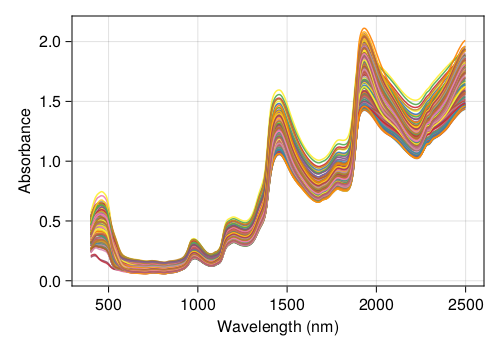

In [11]:
plotsp(X, wl_num;
    xlabel = "Wavelength (nm)", ylabel = "Absorbance").f

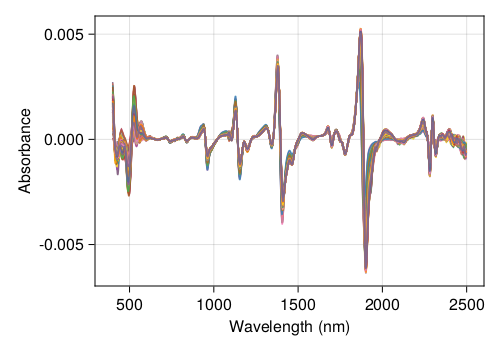

In [12]:
f = 15 ; pol = 3 ; d = 2
Xp = savgol(snv(X); f = f, pol = pol, d = d)

plotsp(Xp, wl_num;
    xlabel = "Wavelength (nm)", ylabel = "Absorbance").f

In [13]:
#### PCA
fm = pcasvd(Xp, nlv = 10) ;
pnames(fm)

(:T, :P, :sv, :xmeans, :xscales, :weights, :niter)

In [14]:
T = fm.T
@head T

... (280, 10)
 


3×10 Matrix{Float64}:
 -0.00450476  -0.00285905  -0.00164444   …  -6.80441e-5   -8.65301e-5
 -0.00545147  -0.00105753   0.000351638      0.000217349  -0.000106793
 -0.00344932  -0.00306893  -0.00169594      -0.000541249  -0.000196326

In [15]:
res = summary(fm, Xp) ;
pnames(res)

(:explvarx, :contr_ind, :contr_var, :coord_var, :cor_circle)

In [16]:
z = res.explvarx

Row,lv,var,pvar,cumpvar
,Int64,Float64,Float64,Float64
1,1,3.49958e-5,0.761613,0.761613
2,2,5.75298e-6,0.125202,0.886815
3,3,1.9187e-6,0.0417565,0.928571
4,4,9.27975e-7,0.0201955,0.948767
5,5,6.25046e-7,0.0136028,0.96237
6,6,4.26518e-7,0.00928228,0.971652
7,7,1.8641e-7,0.00405682,0.975709
8,8,1.15597e-7,0.00251573,0.978224
9,9,1.0908e-7,0.00237391,0.980598


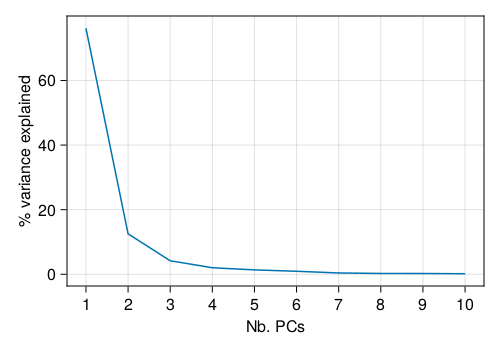

In [17]:
plotgrid(z.lv, 100 * z.pvar; step = 1,
    xlabel = "Nb. PCs", ylabel = "% variance explained").f

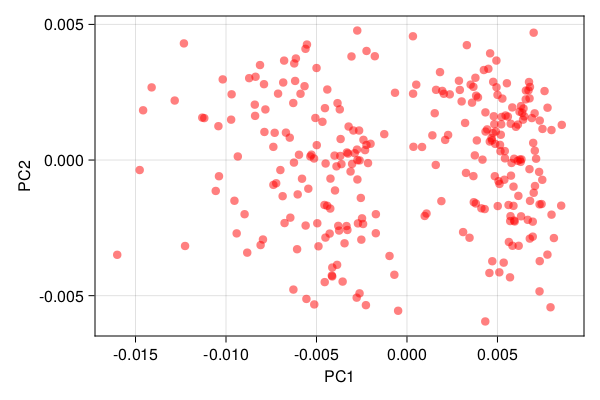

In [18]:
i = 1
plotxy(T[:, i:(i + 1)]; color = (:red, .5),
    xlabel = "PC1", ylabel = "PC2").f

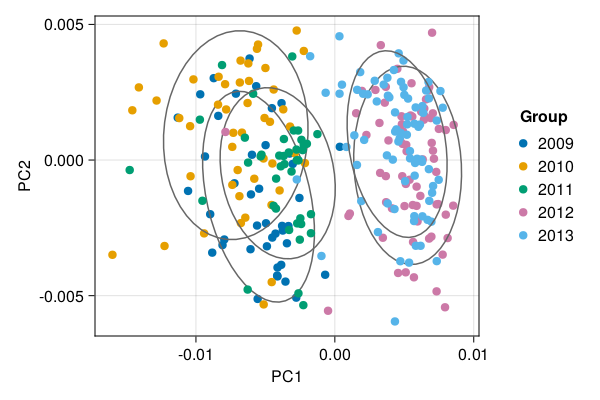

In [19]:
plotxy(T[:, i:(i + 1)], year; ellipse = true,
    xlabel = "PC1", ylabel = "PC2").f

In [20]:
# Variable y
summ(y)

(res = 1×7 DataFrame
 Row │ variable  mean     std      min      max      n      nmissing 
     │ Symbol    Float64  Float64  Float64  Float64  Int64  Int64    
─────┼───────────────────────────────────────────────────────────────
   1 │ x1          6.436    3.503    0.001  15.4425    280         0, ntot = 280)

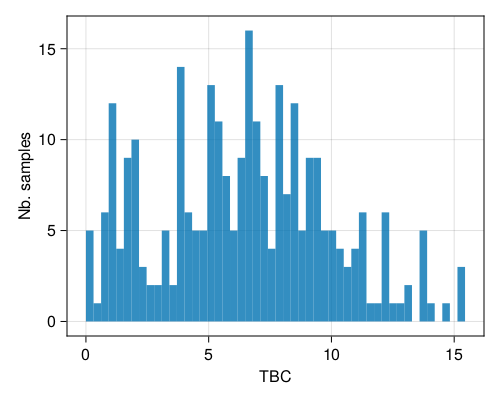

In [21]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = "TBC", ylabel = "Nb. samples")
hist!(ax, y; bins = 50)
f

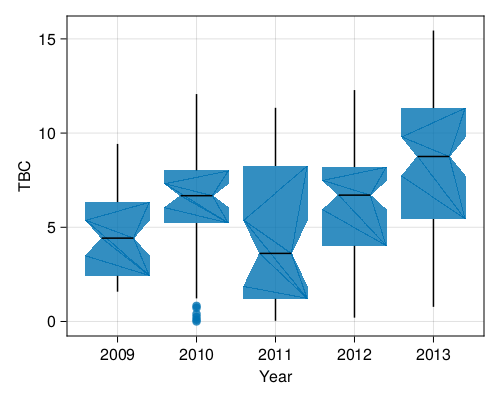

In [22]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = "Year", ylabel = "TBC")
boxplot!(ax, year, y; show_notch = true)
f

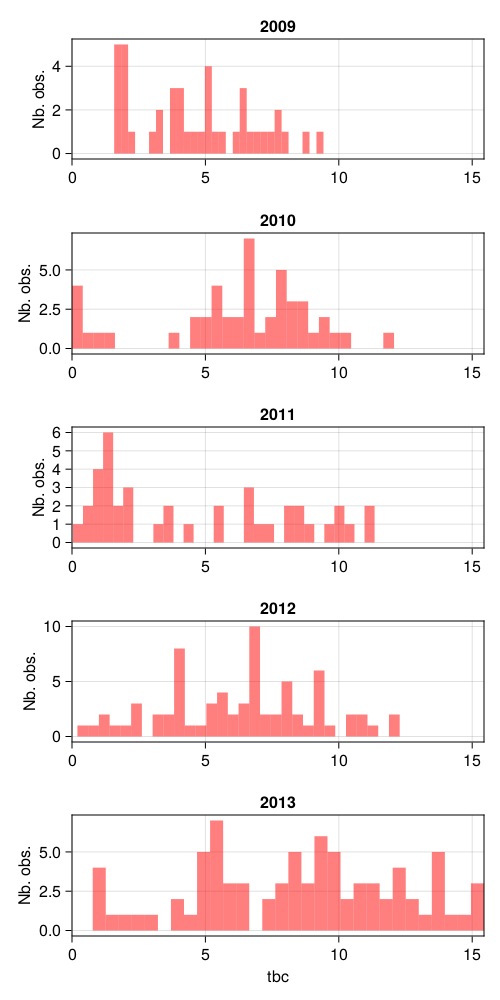

In [23]:
f = Figure(resolution = (500, 1000))
ax = list(nlev)
for i = 1:nlev
    i == nlev ? xlab = "tbc" : xlab = ""
    ax[i] = Axis(f[i, 1], title = string(lev[i]),
        xlabel = xlab,
        ylabel = "Nb. obs.")
    xlims!(0, maximum(y))
    s = year .== lev[i]
    hist!(ax[i], y[s]; bins = 30,
        color = (:red, .5))
end
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*